In [36]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
def make_regression(n_samples=100, bias=0, noise=0):
    
    np.random.seed(0)
    X = np.linspace(0, 1, n_samples)
    
    bias = bias
    
    e = sp.stats.norm(loc=0, scale=noise).rvs(n_samples) / 100
    
    w = np.random.ranf(1)[0]
    
    y = bias + np.dot(w, X) + e

    return X, y, w, e
    

In [109]:
X, y, w, e = make_regression(100, 10, 2)

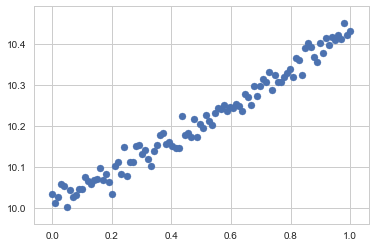

In [110]:
plt.scatter(X, y)

array([[4],
       [3]])

In [192]:
X0.shape

(100, 1)

In [201]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, 
                              coef=True, random_state=1)

X0 = np.vstack((X0, np.array([[4],[3]]) ) )
y = np.hstack((y, np.array([300, 150])))

X = sm.add_constant(X0)
model = sm.OLS(y, X)
result = model.fit()


In [202]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           1.61e-61
Time:                        23:46:50   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2565      2.065      1.577      0.1

In [203]:
wh = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
wh

array([ 3.25646217, 78.33787836])

In [204]:
h = np.dot(X, np.dot(np.linalg.inv(np.dot(X.T, X)), X.T))
m = np.identity(len(X)) - h

In [205]:
np.trace(h)

2.0

In [206]:
leverage = np.diag(h)

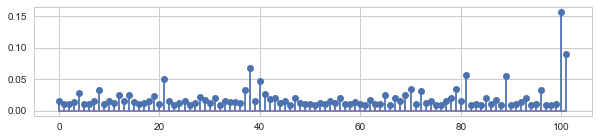

In [207]:
plt.figure(figsize=(10, 2))
plt.stem(leverage)
plt.show()

In [210]:
X0[leverage > 0.05]

array([[ 2.18557541],
       [-2.3015387 ],
       [-2.06014071],
       [-2.02220122],
       [ 4.        ],
       [ 3.        ]])

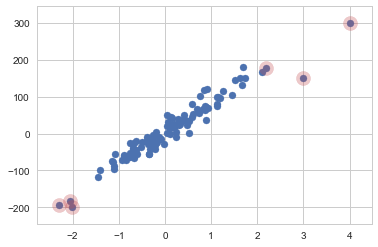

In [219]:
plt.scatter(X0, y)

out_x = X0[leverage > 0.05]
out_y = y[leverage > 0.05]
plt.scatter(out_x, out_y, c='r', alpha=0.3, s=200)